In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset=pd.read_csv("Mall_Customers.csv")

In [3]:
dataset

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [4]:
X=dataset.iloc[:,[3,4]].values

In [5]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=5, min_samples=6).fit(X)  # Adjust eps and min_samples as needed
labels = dbscan.fit_predict(X)

C:\Users\abina\Anac\envs\aiml\lib\site-packages\sklearn\neighbors\base.py:737: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(joblib_version) < LooseVersion('0.12'):
C:\Users\abina\Anac\envs\aiml\lib\site-packages\sklearn\neighbors\base.py:737: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(joblib_version) < LooseVersion('0.12'):
C:\Users\abina\Anac\envs\aiml\lib\site-packages\sklearn\neighbors\base.py:737: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(joblib_version) < LooseVersion('0.12'):
C:\Users\abina\Anac\envs\aiml\lib\site-packages\sklearn\neighbors\base.py:737: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(joblib_version) < LooseVersion('0.12'):


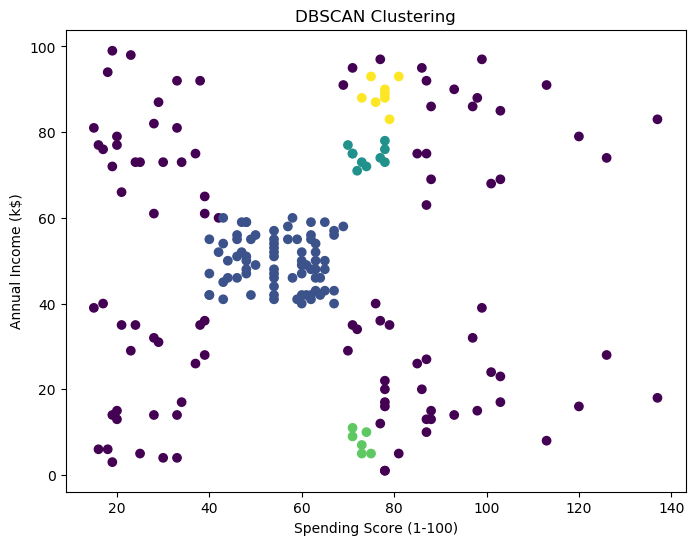

In [6]:
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
plt.title('DBSCAN Clustering')
plt.xlabel('Spending Score (1-100)')
plt.ylabel('Annual Income (k$)')
plt.show()

In [7]:
supervised=pd.DataFrame(dataset)
supervised["cluster_group"]=labels

In [8]:
supervised

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),cluster_group
0,1,Male,19,15,39,-1
1,2,Male,21,15,81,-1
2,3,Female,20,16,6,-1
3,4,Female,23,16,77,-1
4,5,Female,31,17,40,-1
...,...,...,...,...,...,...
195,196,Female,35,120,79,-1
196,197,Female,45,126,28,-1
197,198,Male,32,126,74,-1
198,199,Male,32,137,18,-1


In [9]:
supervised.to_csv("clusters.csv",index=False)

C:\Users\abina\Anac\envs\aiml\lib\site-packages\seaborn\regression.py:582: UserWarning: legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


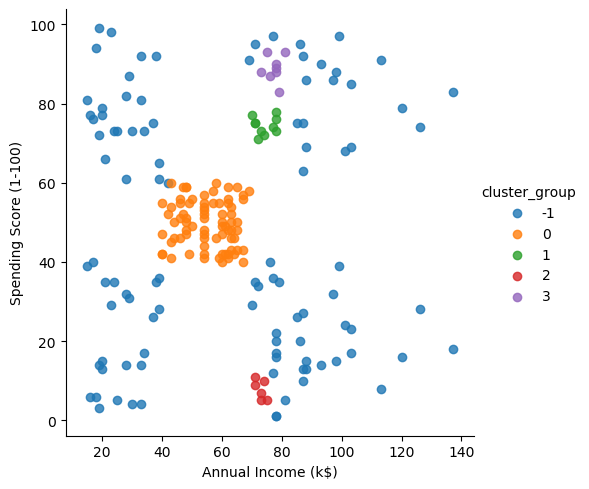

In [10]:
import seaborn as sns #seaborn is a library for graphical purpose
facet=sns.lmplot(data=supervised, x=supervised.columns[3], y=supervised.columns[4], 
                 hue=supervised.columns[5],fit_reg=False, legend=True, legend_out=True)